In [1]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/tasio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('wordcloud')\
    .getOrCreate()

22/11/10 16:10:21 WARN Utils: Your hostname, tasio-virtual-machine resolves to a loopback address: 127.0.1.1; using 192.168.88.129 instead (on interface ens33)
22/11/10 16:10:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/10 16:10:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [7]:
def trata_tweets(df):
    words = df \
        .select (f.explode(f.split(f.lower('_c0'), " ")).alias('word')) \
        .withColumn('word', f.regexp_replace('word', r'http\S+', '')) \
        .withColumn('word', f.regexp_replace('word', r'@\w+', '')) \
        .withColumn('word', f.regexp_replace('word', 'rt', '')) \
        .na.replace('', None) \
        .na.drop()
    return words


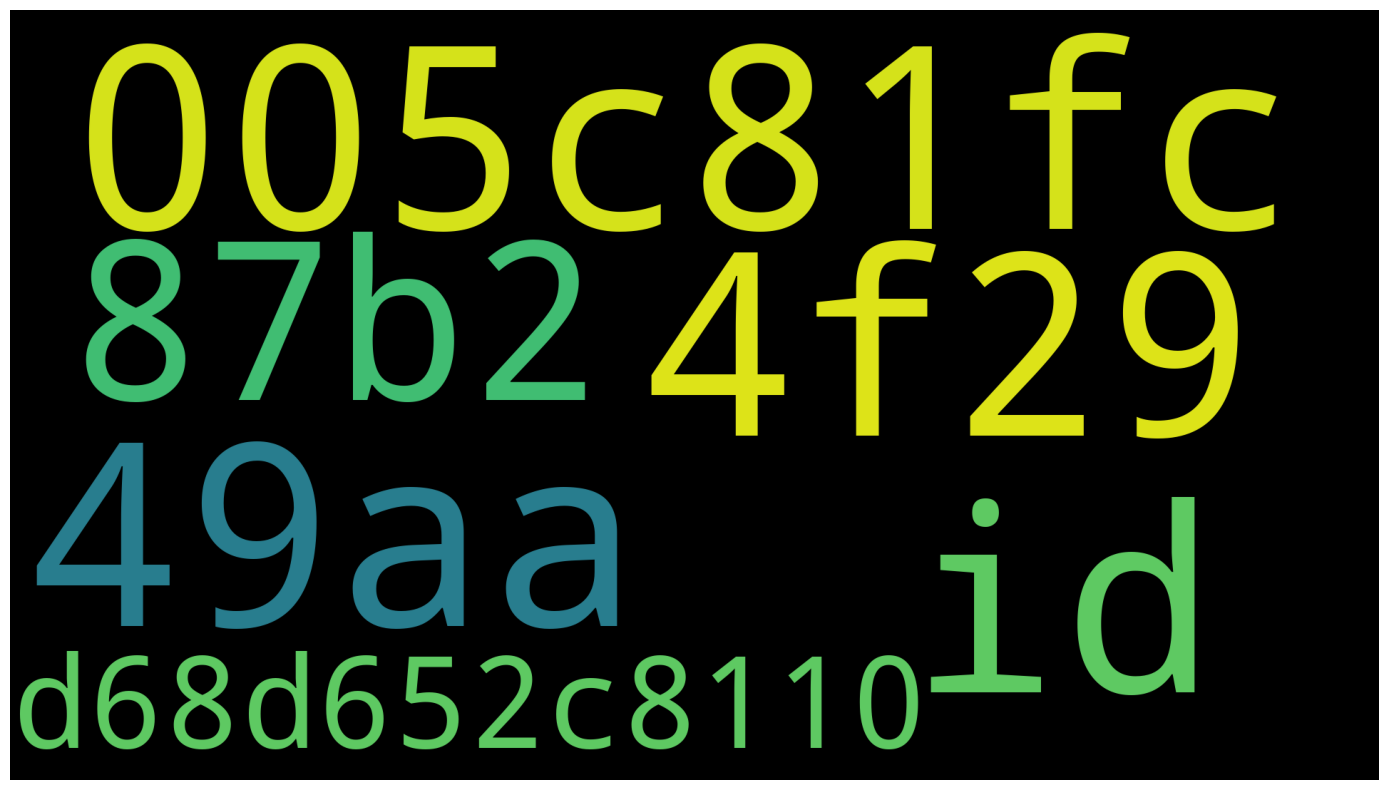

In [10]:
stops = stopwords.words('portuguese')
stops.append('futebol') 
plt.figure(figsize=(20, 10))

while True: 
    try:
        words = spark.read.csv('./csv', encoding='utf-8')
        words = trata_tweets(words)
        rows = words.collect()
        all_words = ''
        for row in rows:
            all_words = all_words + ' ' + row['word']

        wordcloud = WordCloud(stopwords=stops,
                     background_color="black",
                     width=1920,
                     height=1080,
                     max_words=100).generate(all_words)
        plt.cla()        
        plt.axis('off')
        plt.imshow(wordcloud)
        display.display(plt.gcf())  
        display.clear_output(wait=True) 
        time.sleep(5)
    except KeyboardInterrupt:
        break